In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow.keras.utils import to_categorical
from keras.models import load_model
import random as rd
import collections as clt

In [2]:
#load data
df = pd.read_csv('F:/data_edge/3_data/data.csv', header=None)
df = df.sort_values([1, 0])
data = np.array(df)
print('data shape:', data.shape)

train = data[0:8000]
train_data = train[:, 2:502]
train_index = train[:, 0]
train_index = to_categorical(train_index)
print('train data shape:', train_data.shape)

test = data[8000:10000]
test_data = test[:, 2:502]
test_index = test[:, 0]
test_index = to_categorical(test_index)
print('test data shape:', test_data.shape)

data shape: (10000, 1002)
train data shape: (8000, 500)
test data shape: (2000, 500)


In [3]:
#get size list count
data_count = clt.Counter(train_data.flatten())
data_count = dict(sorted(data_count.items(), key = lambda x:x[1], reverse = True))
size_list = list(data_count.keys())[1:1001]
size_count = list(data_count.values())[1:1001]
size_list_count = list()
for i in range(1000):
    for j in range(size_count[i]):
        size_list_count.append(size_list[i])
size_list = np.array(size_list)
size_count = np.array(size_count)
size_list_count = np.array(size_list_count)
print('size list shape:', size_list.shape)
print('size count shape:', size_count.shape)
print('size list count shape:', size_list_count.shape)

size list shape: (1000,)
size count shape: (1000,)
size list count shape: (2108394,)


In [4]:
#random defense overhead
random_overhead = np.zeros((3, 21))

s_list = [500, 1000, 1514]
p_list = np.linspace(0, 100, 21)

for s in range(3):
    for p in range(21):
        size_sum = 0
        size_extra = 0
        for i in range(2000):
            for j in range(500):
                if test_data[i][j] == 0:
                    break
                size_sum += abs(test_data[i][j])
                if rd.randint(0, 100) < p_list[p]:
                    insert = 0
                    if rd.randint(0, 1) == 0:
                        insert = rd.randint(-s_list[s], -54)
                    else:
                        insert = rd.randint(54, s_list[s])
                    size_extra += abs(insert)
        random_overhead[s][p] = size_extra / size_sum
        print(p, end=' ')

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 

In [5]:
#list defense overhead
list_overhead_insert = np.zeros((1, 21))

p_list = np.linspace(0, 100, 21)

for p in range(21):
    size_sum = 0
    size_extra = 0
    for i in range(2000):
        index = 0
        for j in range(500):
            if test_data[i][j] == 0:
                break
            size_sum += abs(test_data[i][j])
            if rd.randint(0, 100) < p_list[p]:
                insert = size_list_count[rd.randint(0, size_list_count.shape[0] - 1)]
                size_extra += abs(insert)
    list_overhead_insert[0][p] = size_extra / size_sum
    print(p, end=' ')
    
list_overhead_divide = np.zeros((1, 21))

p_list = np.linspace(0, 100, 21)
p_real = np.zeros(21)

for p in range(21):
    size_sum = 0
    size_extra = 0
    count_sum = 0
    count_extra = 0
    for i in range(2000):
        index = 0
        for j in range(500):
            if test_data[i][j] == 0:
                break
            first = 0
            second = 0
            if rd.randint(0, 100) < p_list[p]:
                if test_data[i][j] > 200:
                    while True:
                        first = size_list_count[rd.randint(0, size_list_count.shape[0] - 1)]
                        second = test_data[i][j] - first
                        if first > 0 and second > 60:
                            break
                elif test_data[i][j] < -200:
                    while True:
                        first = size_list_count[rd.randint(0, size_list_count.shape[0] - 1)]
                        second = test_data[i][j] - first
                        if first < 0 and second < -60:
                            break
            if first != 0 and second != 0:
                size_extra += 54
                count_extra += 1
            else:
                pass

            size_sum += abs(test_data[i][j])
            count_sum += 1
                
    list_overhead_divide[0][p] = size_extra / size_sum
    p_real[p] = count_extra / count_sum * 100
    print(p, end=' ')

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 

In [10]:
print(p_real)
print(p_real[7])
print(p_real[14])
print(p_real[20])

[ 0.          3.00827799  5.92603484  8.90862679 11.94471656 14.81393565
 17.79263041 20.76459366 23.74381985 26.68531414 29.70085508 32.65811528
 35.66320466 38.52888085 41.46045501 44.47652739 47.58223518 50.43604265
 53.41243452 56.38386633 59.37389838]
20.764593655725594
41.46045501488905
59.37389837894524


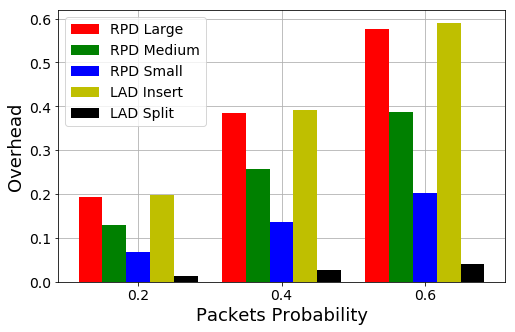

In [16]:
plt.figure(figsize=(8,5))
plt.bar(0, random_overhead[2][4], width=1, color = 'r', zorder=100) #0.2
plt.bar(1, random_overhead[1][4], width=1, color = 'g', zorder=100)
plt.bar(2, random_overhead[0][4], width=1, color = 'b', zorder=100)
plt.bar(3, list_overhead_insert[0][4], width=1, color = 'y', zorder=100)
plt.bar(4, list_overhead_divide[0][7], width=1, color = 'k', zorder=100)

plt.bar(6, random_overhead[2][8], width=1, color = 'r', zorder=100) #0.4
plt.bar(7, random_overhead[1][8], width=1, color = 'g', zorder=100)
plt.bar(8, random_overhead[0][8], width=1, color = 'b', zorder=100)
plt.bar(9, list_overhead_insert[0][8], width=1, color = 'y', zorder=100)
plt.bar(10, list_overhead_divide[0][14], width=1, color = 'k', zorder=100)

plt.bar(12, random_overhead[2][12], width=1, color = 'r', zorder=100) #0.6
plt.bar(13, random_overhead[1][12], width=1, color = 'g', zorder=100)
plt.bar(14, random_overhead[0][12], width=1, color = 'b', zorder=100)
plt.bar(15, list_overhead_insert[0][12], width=1, color = 'y', zorder=100)
plt.bar(16, list_overhead_divide[0][20], width=1, color = 'k', zorder=100)

plt.legend(['RPD Large', 'RPD Medium', 'RPD Small', 'LAD Insert', 'LAD Split'], fontsize=14)
plt.xticks([2, 8, 14], ['0.2', '0.4', '0.6'])
plt.xlabel('Packets Probability', fontsize=18)
plt.ylabel('Overhead', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.savefig('C:/Users/Admin/Desktop/overhead.pdf', bbox_inches = 'tight')